In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
classes = ['cloudy', 'rain', 'shine', 'sunrise']
base_dir = '/content/gdrive/MyDrive/image_datasets/Multi-class Weather Dataset'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(250 , 250),
    batch_size= 32,
    #classes=classes,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir, # same directory as training data
    target_size=(250, 250),
    batch_size= 32,
    #classes=classes,
    subset='validation') # set as validation data

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
labels = (train_generator.class_indices)
labels = dict((v , k) for k , v in labels.items())
print(labels)

{0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

model = tf.keras.Sequential()
model.add(Input((250,250,3)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(8, (8, 8), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(4, (4, 4), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 8)       1544      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 8)         4104      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 8)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 4)         516       
                                                                 
 flatten (Flatten)           (None, 3844)              0

In [ ]:
train_steps_per_epoch = train_generator.n // train_generator.batch_size
val_steps = validation_generator.n // validation_generator.batch_size
print(train_steps_per_epoch, val_steps)

28 7


In [ ]:
%cd /content/gdrive/MyDrive/image_datasets
#mc = ModelCheckpoint(mode='max', filepath='weights.h5', monitor='val_accuracy',save_best_only='True', verbose=1)
es = EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)

/content/gdrive/MyDrive/image_datasets


In [ ]:
history = model.fit(train_generator ,
          validation_data = validation_generator ,
          epochs = 20 ,
          steps_per_epoch = train_steps_per_epoch, # train_files/batch_size
          validation_steps = val_steps, # valid_files/batch_size 
          callbacks=[es],
          verbose=1
          ) 

Epoch 1/20
28/28 [==============================] - 105s 4s/step - loss: 0.8724 - accuracy: 0.6375 - val_loss: 0.8066 - val_accuracy: 0.7723
Epoch 2/20
28/28 [==============================] - 25s 903ms/step - loss: 0.7130 - accuracy: 0.7606 - val_loss: 0.7395 - val_accuracy: 0.6741
Epoch 3/20
28/28 [==============================] - 25s 929ms/step - loss: 0.6052 - accuracy: 0.7722 - val_loss: 0.7122 - val_accuracy: 0.7277
Epoch 4/20
28/28 [==============================] - 25s 907ms/step - loss: 0.5126 - accuracy: 0.8067 - val_loss: 0.6330 - val_accuracy: 0.7589
Epoch 5/20
28/28 [==============================] - 25s 883ms/step - loss: 0.5759 - accuracy: 0.7687 - val_loss: 0.5578 - val_accuracy: 0.8170
Epoch 6/20
28/28 [==============================] - 25s 903ms/step - loss: 0.4753 - accuracy: 0.8159 - val_loss: 0.6623 - val_accuracy: 0.7857
Epoch 7/20
28/28 [==============================] - 25s 899ms/step - loss: 0.4949 - accuracy: 0.8239 - val_loss: 0.5794 - val_accuracy: 0.8214
E

In [ ]:
model.save/content/gdrive/MyDrive/weights_h5/weather_model.h5')

In [ ]:
trained_model = tf.keras.models.load_model("/content/gdrive/MyDrive/weights_h5/weather_model.h5")

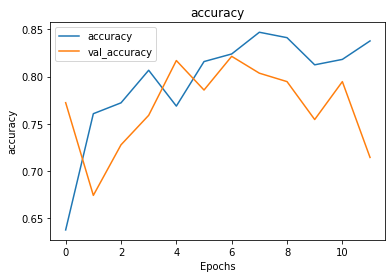

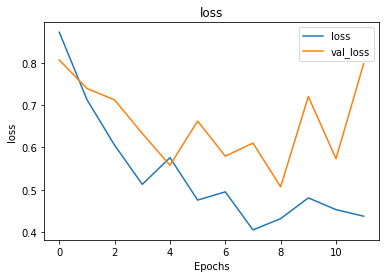

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
trained_model.evaluate(validation_generator,steps=val_steps)

7/7 [==============================] - 6s 799ms/step - loss: 0.8057 - accuracy: 0.7098


[0.8056712746620178, 0.7098214030265808]

In [ ]:
from tensorflow.keras.preprocessing import image
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder

In [ ]:
import numpy as np

In [ ]:
def prediction(test_path):
    img = image.load_img(test_path , target_size = (250 , 250))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
        
    plt.title('Image')
    plt.axis('off')
    plt.imshow(img.squeeze())
        
    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]
        
    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

Prediction Value:  0.9721459
Classified: Shine


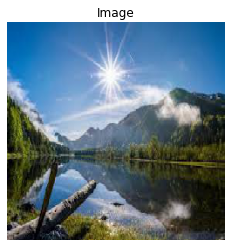

In [ ]:
prediction('/content/gdrive/MyDrive/image_datasets/Multi-class Weather Dataset/Shine/shine101.jpg')